Using Colab cache for faster access to the 'diet-plan-recommendation' dataset.
Path to dataset files: /kaggle/input/diet-plan-recommendation
Found CSV files: ['Dataset.csv']
Using data file: /kaggle/input/diet-plan-recommendation/Dataset.csv

Loaded dataset shape: (10726, 11)


,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0



Missing values:
age                            0
weight(kg)                     0
height(m)                      0
gender                         0
BMI                            0
BMR                            0
activity_level                 0
calories_to_maintain_weight    0
BMI_tags                       0
Label                          0
dtype: int64


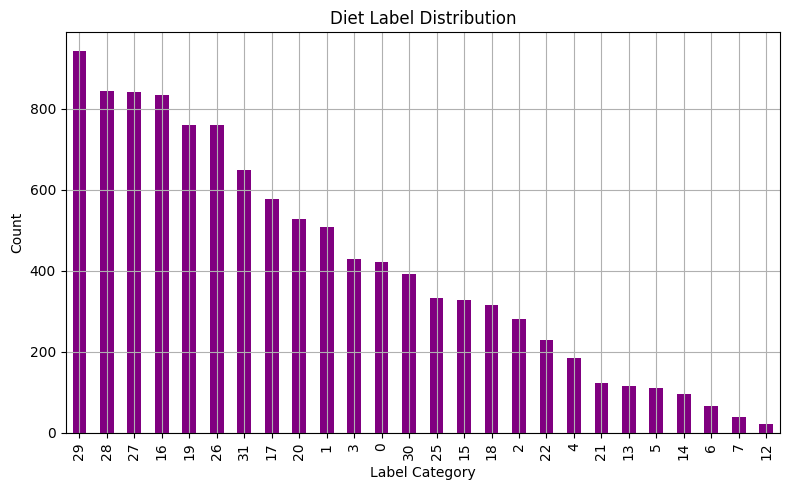

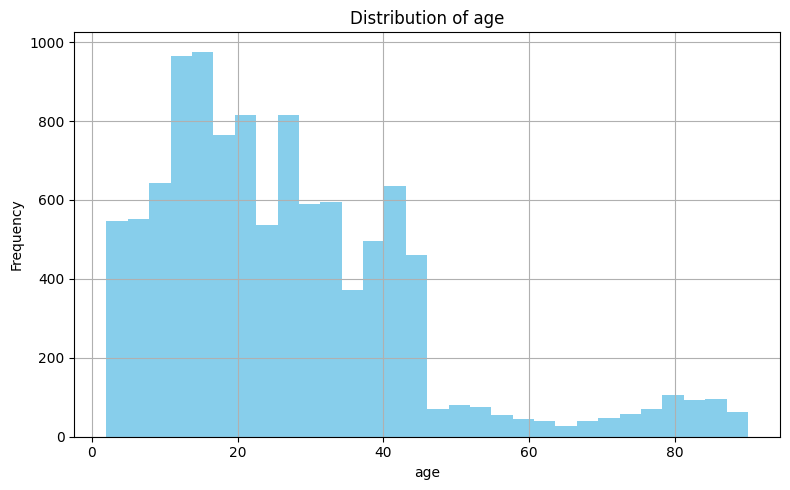

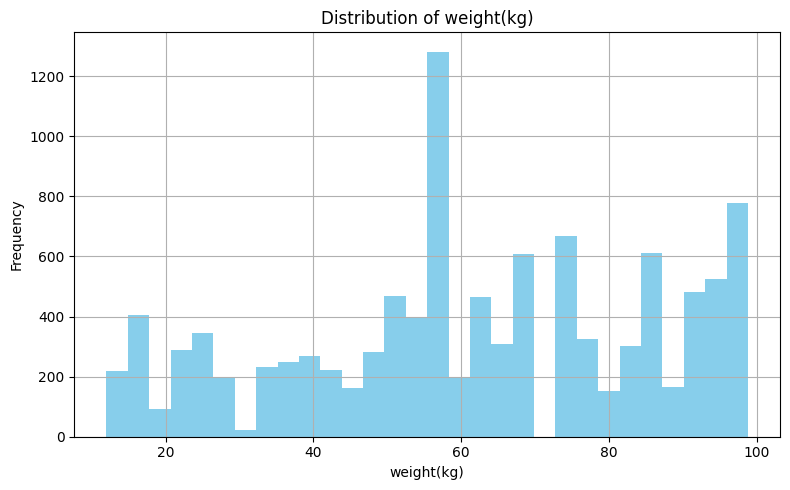

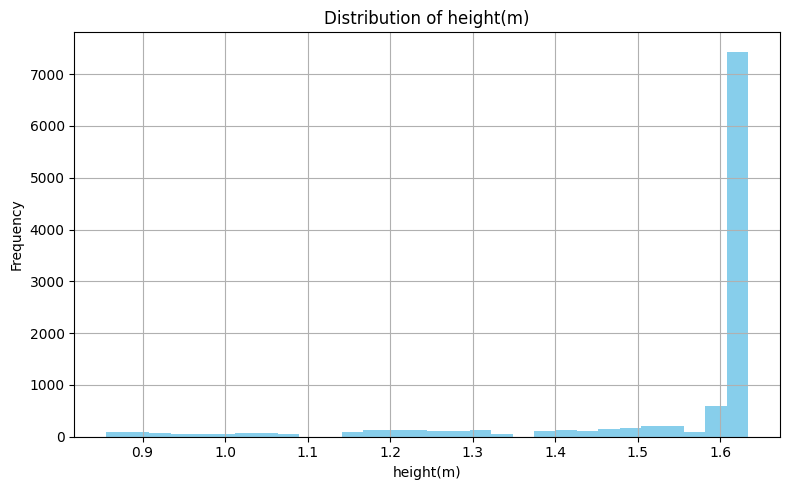

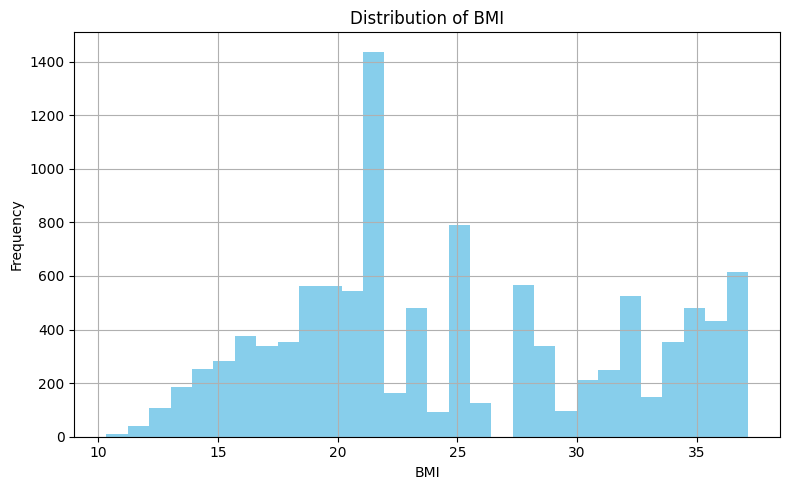

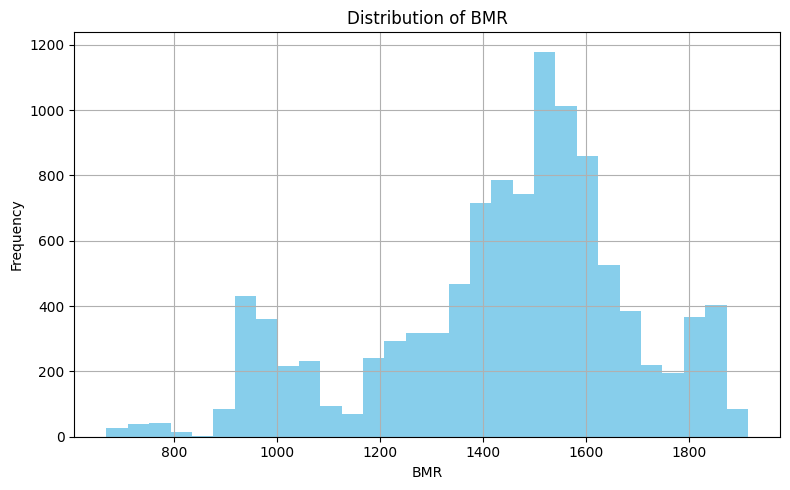

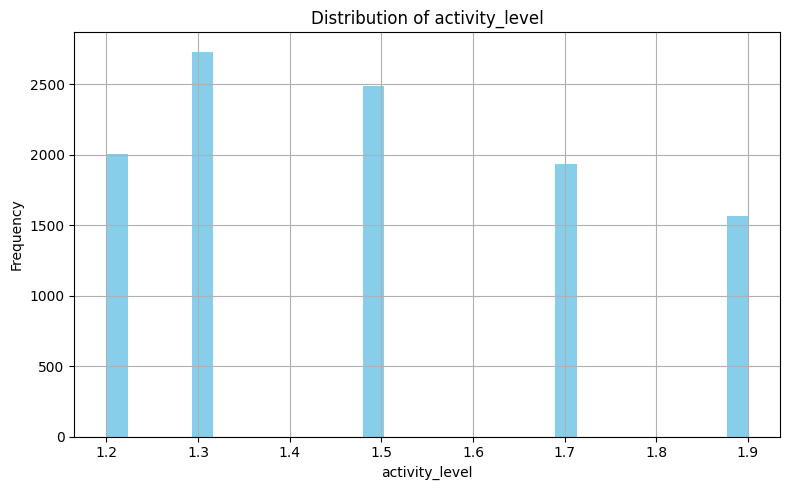

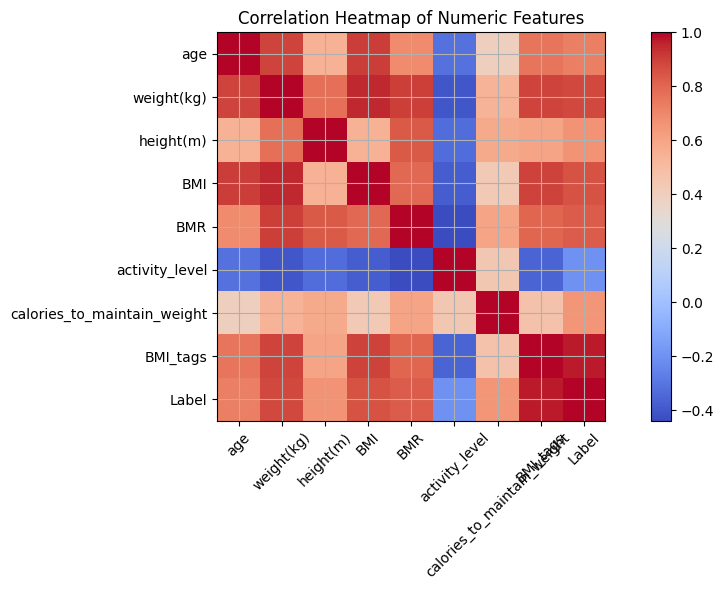

Numeric features: ['age', 'weight(kg)', 'height(m)', 'BMI', 'BMR', 'activity_level', 'calories_to_maintain_weight', 'BMI_tags']
Categorical features: ['gender']
Training model...

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00       102
           2       1.00      0.98      0.99        56
           3       0.99      0.99      0.99        86
           4       0.97      1.00      0.99        37
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        65
          16       1.00      1.00      1.00       167
          17       1.00      1.00      

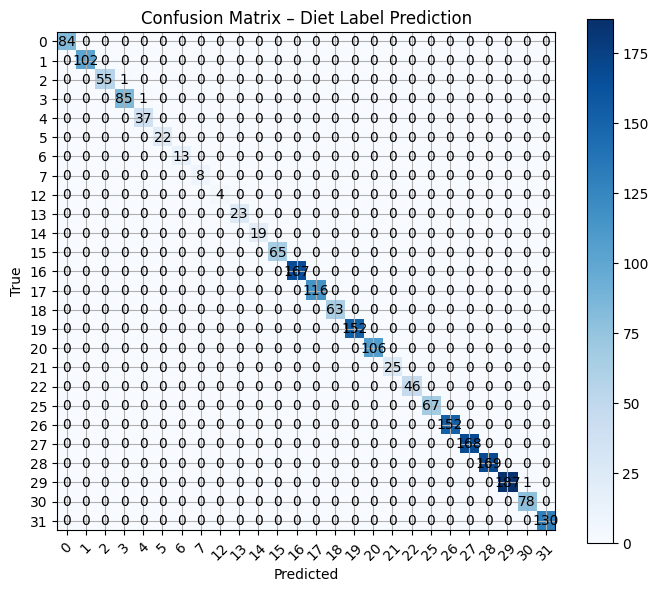


Example diet recommendation:
Predicted Label: 19
Confidence: 53.67 %


In [ ]:
# ============================================================
# Diet Plan Recommendation – Thesis End-to-End Code (Corrected)
# Dataset: vechoo/diet-plan-recommendation (Dataset.csv)
# Target Column: Label
# ============================================================

# -----------------------------
# 0. Imports
# -----------------------------
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import kagglehub  # pip install kagglehub

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

# -----------------------------
# 1. Download dataset
# -----------------------------
print("Downloading Kaggle dataset vechoo/diet-plan-recommendation ...")
path = kagglehub.dataset_download("vechoo/diet-plan-recommendation")
print("Path to dataset files:", path)

csv_files = glob.glob(os.path.join(path, "*.csv"))
print("Found CSV files:", [os.path.basename(x) for x in csv_files])

data_path = csv_files[0]
print("Using data file:", data_path)

# -----------------------------
# 2. Load dataset
# -----------------------------
df = pd.read_csv(data_path)
print("\nLoaded dataset shape:", df.shape)
display(df.head())

# -----------------------------
# 3. Clean dataset
# -----------------------------
# remove unnecessary index column
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

TARGET_COL = "Label"

# Confirm target exists
if TARGET_COL not in df.columns:
    raise KeyError(f"Target column {TARGET_COL} not found!")

# No missing values but check regardless
print("\nMissing values:")
print(df.isnull().sum())

# -----------------------------
# 4. EDA Visualizations
# -----------------------------

# Class distribution
plt.figure()
df[TARGET_COL].value_counts().plot(kind="bar", color="purple")
plt.title("Diet Label Distribution")
plt.xlabel("Label Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Histograms of main numeric features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

for col in numeric_cols[:6]:
    plt.figure()
    df[col].plot(kind="hist", bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Correlation heatmap
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Prepare Features
# -----------------------------
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# -----------------------------
# 6. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 7. Preprocessing + Model
# -----------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

model = RandomForestClassifier(
    n_estimators=300, random_state=42, class_weight="balanced"
)

from sklearn.pipeline import Pipeline
clf = Pipeline(steps=[("preprocess", preprocess), ("model", model)])

print("Training model...")
clf.fit(X_train, y_train)

# -----------------------------
# 8. Evaluation
# -----------------------------
y_pred = clf.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())

plt.figure(figsize=(7, 6))
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.title("Confusion Matrix – Diet Label Prediction")

plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# -----------------------------
# 9. Recommendation Function
# -----------------------------
def recommend_diet(input_features: dict):
    """
    input_features: dictionary matching dataset feature names.
    Example:
        {"age": 20, "weight(kg)": 55, "height(m)": 1.65, ...}
    """
    row = pd.DataFrame([input_features])

    # add missing columns (if any)
    for col in X.columns:
        if col not in row.columns:
            if col in numeric_features:
                row[col] = X[col].median()
            else:
                row[col] = X[col].mode()[0]

    row = row[X.columns]

    pred = clf.predict(row)[0]
    prob = max(clf.predict_proba(row)[0])

    return pred, prob

# Example prediction
example = {
    "age": 25,
    "weight(kg)": 70,
    "height(m)": 1.72,
    "gender": "M",
    "BMI": 23.6,
    "BMR": 1600,
    "activity_level": 1.55,
    "calories_to_maintain_weight": 2400,
    "BMI_tags": 5
}

diet_type, confidence = recommend_diet(example)
print("\nExample diet recommendation:")
print("Predicted Label:", diet_type)
print("Confidence:", round(confidence * 100, 2), "%")


Using Colab cache for faster access to the 'diet-plan-recommendation' dataset.
Path: /kaggle/input/diet-plan-recommendation
Found CSV files: ['Dataset.csv']
Using: /kaggle/input/diet-plan-recommendation/Dataset.csv

Raw shape: (10726, 11)


,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0



Unique original labels: [0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31]
Encoded labels (classes_): [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31)]

Missing values per column:
 age                            0
weight(kg)                     0
height(m)                      0
gender                         0
BMI                            0
BMR                            0
activity_level                 0
calories_to_maintain_weight    0
BMI_tags                       0
Label                          0
Label_encoded                  0
dtype: int64


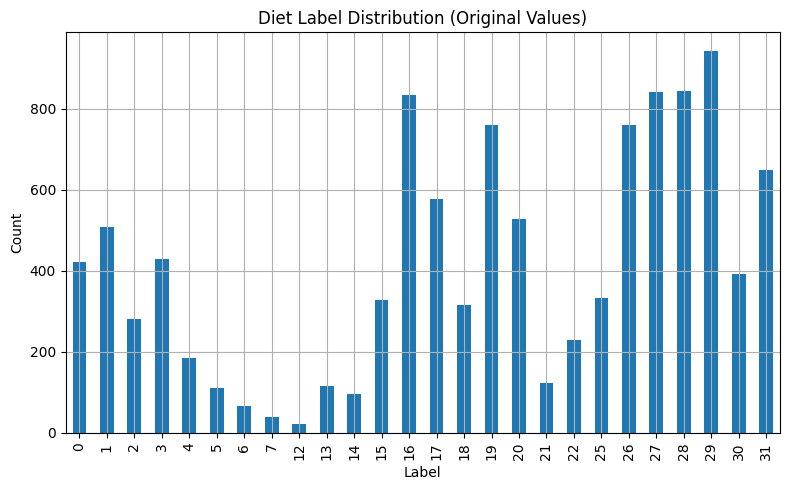


Numeric columns: ['age', 'weight(kg)', 'height(m)', 'BMI', 'BMR', 'activity_level', 'calories_to_maintain_weight', 'BMI_tags', 'Label', 'Label_encoded']


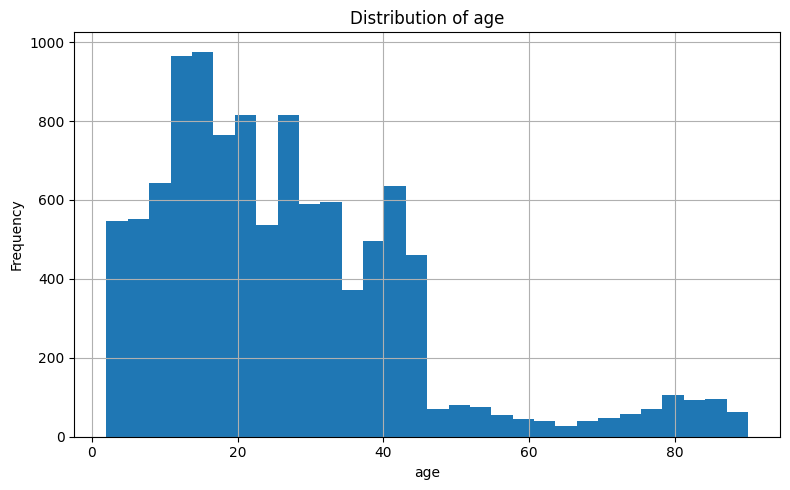

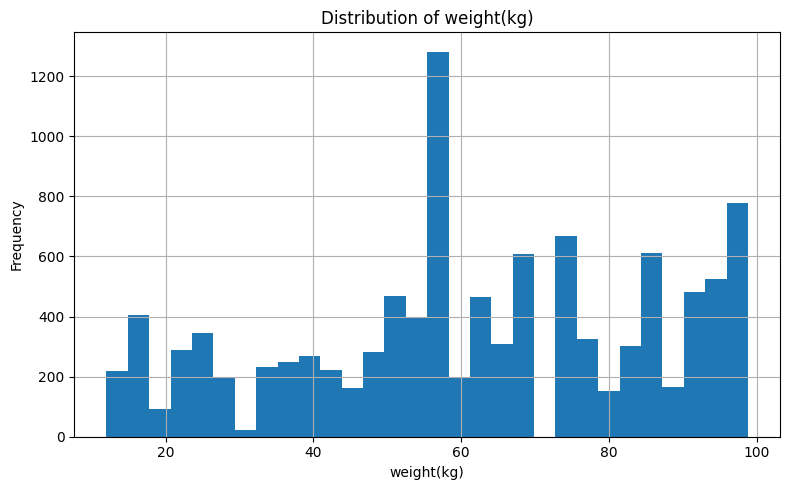

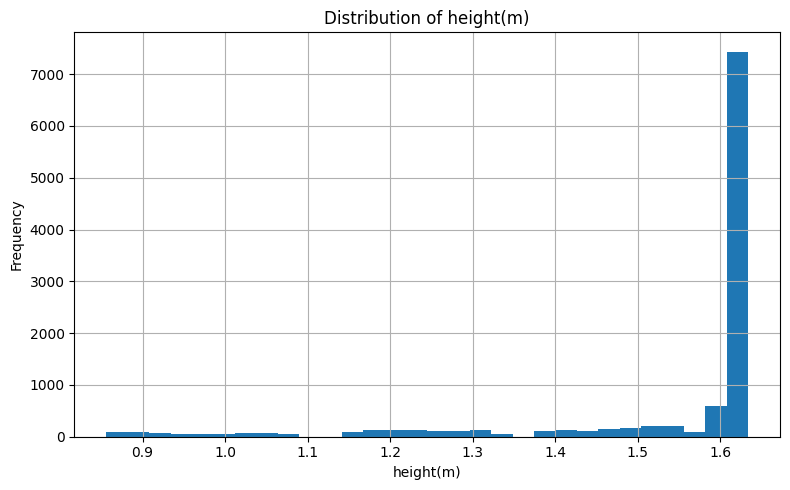

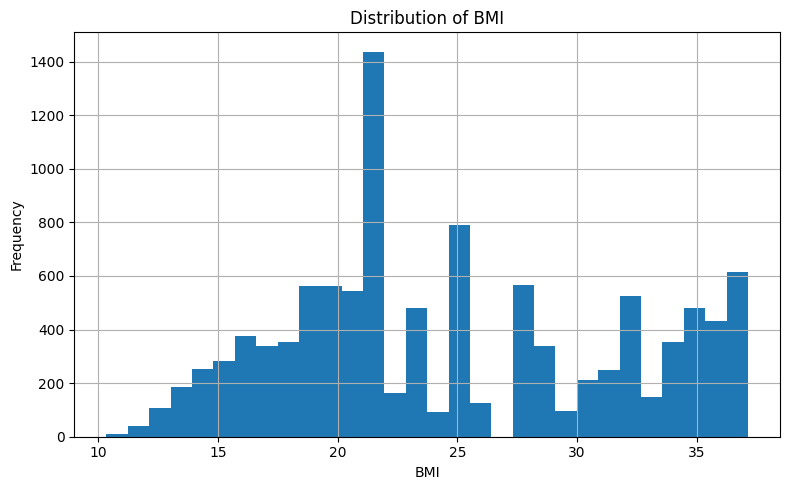

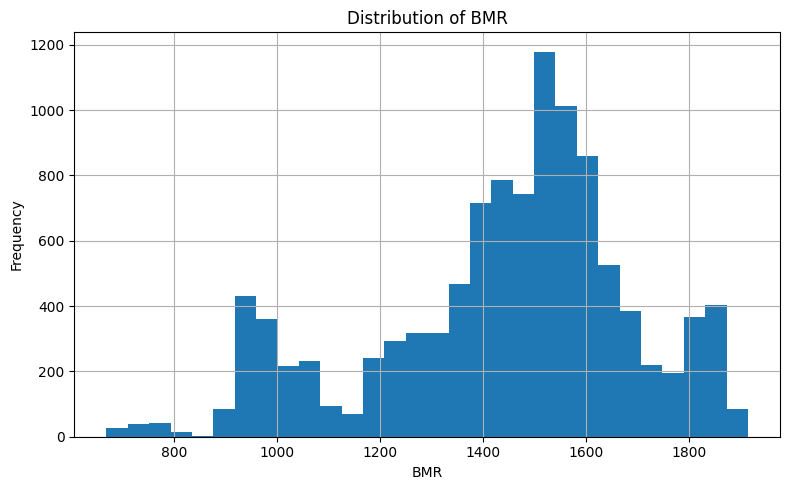

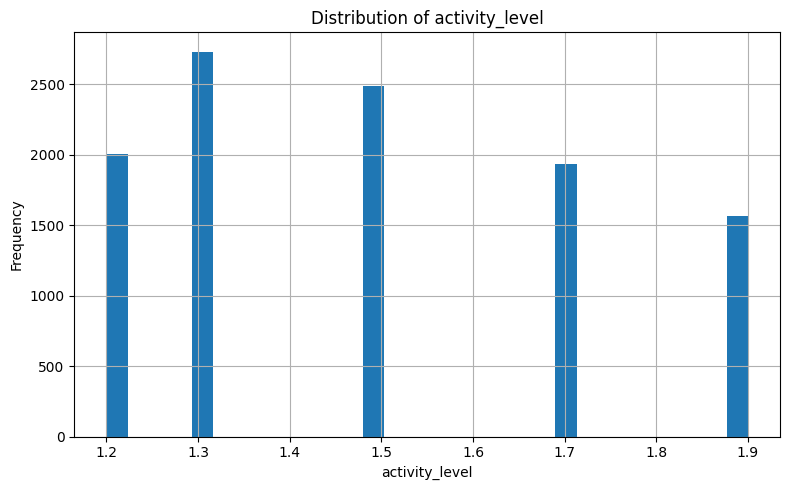

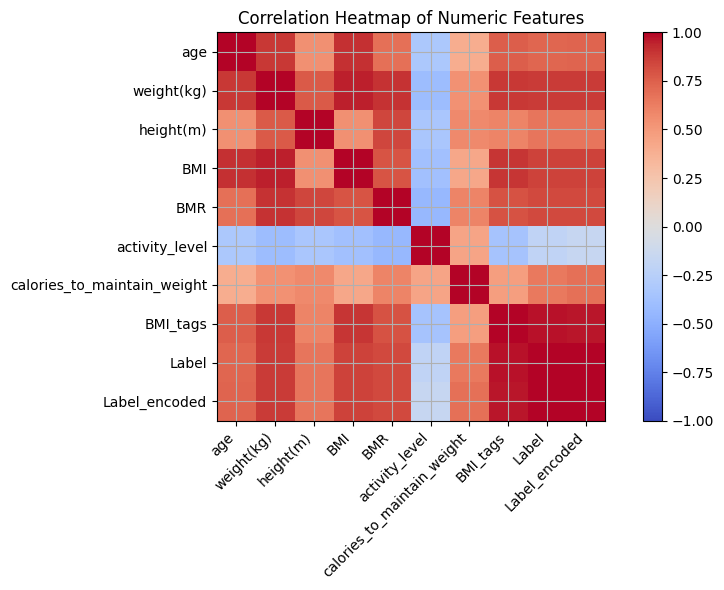


Numeric features: ['age', 'weight(kg)', 'height(m)', 'BMI', 'BMR', 'activity_level', 'calories_to_maintain_weight', 'BMI_tags']
Categorical features: ['gender']

Train shape: (8580, 9) Test shape: (2146, 9)

=== Training RandomForest ===
RandomForest Accuracy: 0.9986, F1-macro: 0.9983

=== Training XGBoost ===
XGBoost Accuracy: 0.9907, F1-macro: 0.9847

=== Training MLP ===
MLP Accuracy: 0.9846, F1-macro: 0.9767

=== Training StackingHybrid ===
StackingHybrid Accuracy: 0.9991, F1-macro: 0.9993

Model Performance Summary:


,Model,Accuracy,F1_macro
3,StackingHybrid,0.999068,0.999307
0,RandomForest,0.998602,0.998346
1,XGBoost,0.990680,0.984745
2,MLP,0.984623,0.976687



Best model selected: StackingHybrid

Classification Report (Best Model – StackingHybrid, original labels):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        65
          16       1.00      1.00      1.00       167
          17       1.00      1.00      1.00       116
          18       1.00      1.00      1.00        63
          19       1.00   

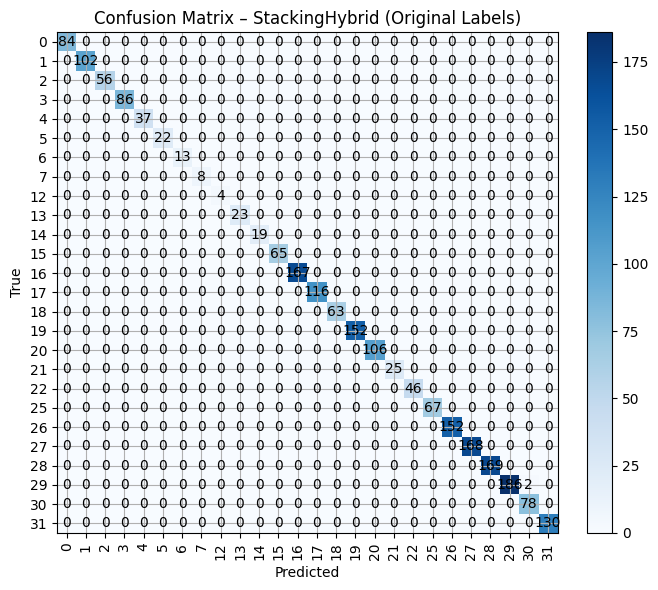

Best model is not tree-based, skipping feature importance plot.


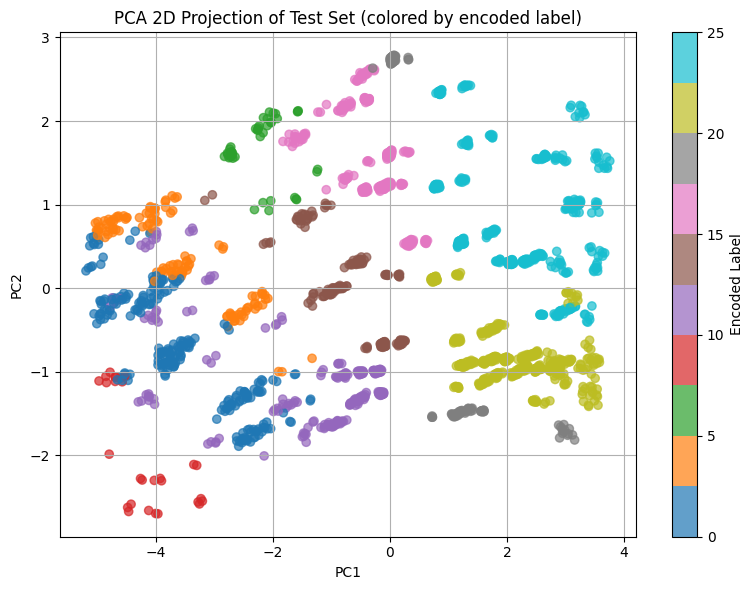

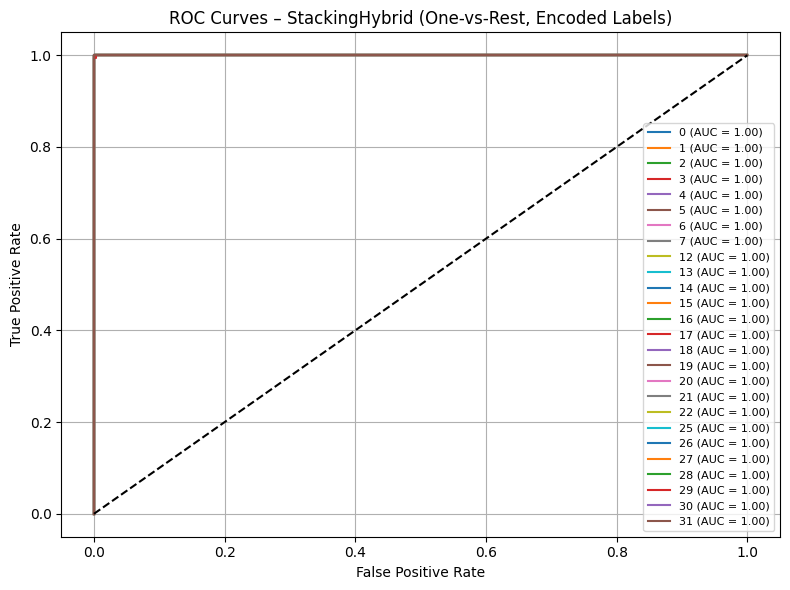


Example recommendation (using best model):
Predicted Label (original): 6
Confidence: 49.92 %


In [ ]:
# ============================================================
# Diet Plan Recommendation – Advanced / Hybrid Models + Visuals
# Dataset: vechoo/diet-plan-recommendation (Dataset.csv)
# Target: Label (encoded to 0..K-1)
# ============================================================

# -----------------------------
# 0. Imports
# -----------------------------
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_curve,
    auc,
)
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import kagglehub
import xgboost as xgb

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

# -----------------------------
# 1. Download + Load Dataset
# -----------------------------
print("Downloading Kaggle dataset vechoo/diet-plan-recommendation ...")
path = kagglehub.dataset_download("vechoo/diet-plan-recommendation")
print("Path:", path)

csv_files = glob.glob(os.path.join(path, "*.csv"))
print("Found CSV files:", [os.path.basename(x) for x in csv_files])
data_path = csv_files[0]
print("Using:", data_path)

df = pd.read_csv(data_path)
print("\nRaw shape:", df.shape)
display(df.head())

# -----------------------------
# 2. Cleaning + Target Encoding
# -----------------------------
# Drop useless index column if present
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

original_target_col = "Label"

if original_target_col not in df.columns:
    raise KeyError(f"Target column {original_target_col} not found. Available: {df.columns.tolist()}")

# Encode Label -> Label_encoded (0..K-1, contiguous)
le = LabelEncoder()
df["Label_encoded"] = le.fit_transform(df[original_target_col])
TARGET_COL = "Label_encoded"

print("\nUnique original labels:", sorted(df[original_target_col].unique().tolist()))
print("Encoded labels (classes_):", list(le.classes_))

print("\nMissing values per column:\n", df.isna().sum())

# -----------------------------
# 3. EDA – Fancy Visuals
# -----------------------------
# 3.1 Class distribution (original labels)
plt.figure()
df[original_target_col].value_counts().sort_index().plot(kind="bar")
plt.title("Diet Label Distribution (Original Values)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3.2 Numeric distributions
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("\nNumeric columns:", numeric_cols)

for col in numeric_cols[:6]:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 3.3 Correlation heatmap (numeric only)
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Feature / Target Split
# -----------------------------
X = df.drop(columns=[original_target_col, TARGET_COL])
y = df[TARGET_COL]  # encoded target

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool"]).columns.tolist()

print("\nNumeric features:", numeric_features)
print("Categorical features:", categorical_features)

# -----------------------------
# 5. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)

# Save original-label y_test for nicer reporting later
y_test_orig = le.inverse_transform(y_test)

# -----------------------------
# 6. Preprocessor
# -----------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# -----------------------------
# 7. Models (Baseline + Fancy + Hybrid)
# -----------------------------
models = {}

# 7.1 Random Forest
models["RandomForest"] = Pipeline(
    steps=[
        ("preprocess", preprocess),
        (
            "model",
            RandomForestClassifier(
                n_estimators=300,
                random_state=42,
                class_weight="balanced",
            ),
        ),
    ]
)

# 7.2 XGBoost – now safe because labels are 0..K-1
models["XGBoost"] = Pipeline(
    steps=[
        ("preprocess", preprocess),
        (
            "model",
            xgb.XGBClassifier(
                n_estimators=400,
                max_depth=5,
                learning_rate=0.05,
                subsample=0.9,
                colsample_bytree=0.9,
                objective="multi:softprob",
                eval_metric="mlogloss",
                random_state=42,
                tree_method="hist",
            ),
        ),
    ]
)

# 7.3 MLP Neural Network
models["MLP"] = Pipeline(
    steps=[
        ("preprocess", preprocess),
        (
            "model",
            MLPClassifier(
                hidden_layer_sizes=(64, 32),
                activation="relu",
                solver="adam",
                max_iter=300,
                random_state=42,
            ),
        ),
    ]
)

# 7.4 Hybrid Stacking Ensemble
# Use base estimators again, not the pipelines
rf_base = RandomForestClassifier(
    n_estimators=250, random_state=42, class_weight="balanced"
)
xgb_base = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="multi:softprob",
    eval_metric="mlogloss",
    random_state=42,
    tree_method="hist",
)
mlp_base = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=300,
    random_state=42,
)

stack_model = StackingClassifier(
    estimators=[
        ("rf", rf_base),
        ("xgb", xgb_base),
        ("mlp", mlp_base),
    ],
    final_estimator=LogisticRegression(max_iter=500),
    stack_method="predict_proba",
    passthrough=False,
    n_jobs=-1,
)

models["StackingHybrid"] = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", stack_model),
    ]
)

# -----------------------------
# 8. Train + Evaluate All Models
# -----------------------------
results = []

for name, pipe in models.items():
    print(f"\n=== Training {name} ===")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")

    print(f"{name} Accuracy: {acc:.4f}, F1-macro: {f1_macro:.4f}")
    results.append({"Model": name, "Accuracy": acc, "F1_macro": f1_macro})

results_df = pd.DataFrame(results).sort_values("F1_macro", ascending=False)
print("\nModel Performance Summary:")
display(results_df)

best_model_name = results_df.iloc[0]["Model"]
best_clf = models[best_model_name]
print("\nBest model selected:", best_model_name)

# -----------------------------
# 9. Detailed Evaluation for Best Model
# -----------------------------
y_pred_best = best_clf.predict(X_test)
y_pred_best_orig = le.inverse_transform(y_pred_best)

print(f"\nClassification Report (Best Model – {best_model_name}, original labels):\n")
print(classification_report(y_test_orig, y_pred_best_orig))

cm = confusion_matrix(y_test_orig, y_pred_best_orig)
labels_orig = sorted(le.classes_)

plt.figure(figsize=(8, 6))
im = plt.imshow(cm, cmap="Blues")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title(f"Confusion Matrix – {best_model_name} (Original Labels)")
plt.xticks(range(len(labels_orig)), labels_orig, rotation=90)
plt.yticks(range(len(labels_orig)), labels_orig)
for i in range(len(labels_orig)):
    for j in range(len(labels_orig)):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# -----------------------------
# 10. Feature Importance (tree-based best)
# -----------------------------
if best_model_name in ["RandomForest", "XGBoost"]:
    preprocess_fitted = best_clf.named_steps["preprocess"]
    model_fitted = best_clf.named_steps["model"]

    feature_names = preprocess_fitted.get_feature_names_out()
    if hasattr(model_fitted, "feature_importances_"):
        importances = model_fitted.feature_importances_
    elif hasattr(model_fitted, "feature_importances"):
        importances = model_fitted.feature_importances()
    else:
        importances = None

    if importances is not None:
        fi = pd.DataFrame(
            {"feature": feature_names, "importance": importances}
        ).sort_values("importance", ascending=False)

        top_n = min(15, len(fi))
        plt.figure(figsize=(8, 6))
        plt.barh(fi["feature"].head(top_n)[::-1], fi["importance"].head(top_n)[::-1])
        plt.title(f"Top {top_n} Feature Importances – {best_model_name}")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()
    else:
        print("Best tree-based model has no feature_importances_ attribute.")
else:
    print("Best model is not tree-based, skipping feature importance plot.")

# -----------------------------
# 11. PCA 2D Projection (Fancy Visual)
# -----------------------------
preprocess_fitted = best_clf.named_steps["preprocess"]
X_test_transformed = preprocess_fitted.transform(X_test)

pca = PCA(n_components=2, random_state=42)
X_test_pca = pca.fit_transform(X_test_transformed)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_test_pca[:, 0],
    X_test_pca[:, 1],
    c=y_test,
    cmap="tab10",
    alpha=0.7,
)
plt.title("PCA 2D Projection of Test Set (colored by encoded label)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Encoded Label")
plt.tight_layout()
plt.show()

# -----------------------------
# 12. ROC Curves (Multi-class, One-vs-Rest, Encoded)
# -----------------------------
classes = np.arange(len(le.classes_))  # encoded classes 0..K-1
y_test_bin = label_binarize(y_test, classes=classes)

if hasattr(best_clf.named_steps["model"], "predict_proba"):
    y_score = best_clf.predict_proba(X_test)

    plt.figure(figsize=(8, 6))
    for i, cls_id in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        label_str = f"{le.classes_[cls_id]} (AUC = {roc_auc:.2f})"
        plt.plot(fpr, tpr, label=label_str)

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves – {best_model_name} (One-vs-Rest, Encoded Labels)")
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()
else:
    print("Best model does not support predict_proba, skipping ROC curves.")

# -----------------------------
# 13. User-facing Recommendation Function
# -----------------------------
def recommend_diet(input_features: dict):
    """
    input_features: dict with keys matching original feature names in X.
    Example:
        {
          "age": 25,
          "weight(kg)": 70,
          "height(m)": 1.72,
          "gender": "M",
          "BMI": 23.6,
          "BMR": 1600,
          "activity_level": 1.55,
          "calories_to_maintain_weight": 2400,
          "BMI_tags": 5
        }
    """
    row = pd.DataFrame([input_features])

    for col in X.columns:
        if col not in row.columns:
            if col in numeric_features:
                row[col] = X[col].median()
            else:
                row[col] = X[col].mode()[0]

    row = row[X.columns]
    pred_encoded = best_clf.predict(row)[0]
    pred_label = le.inverse_transform([pred_encoded])[0]

    if hasattr(best_clf.named_steps["model"], "predict_proba"):
        proba = best_clf.predict_proba(row)[0]
        conf = float(np.max(proba))
    else:
        conf = None

    return pred_label, conf

# Example usage
example = {
    "age": 25,
    "weight(kg)": 70,
    "height(m)": 1.72,
    "gender": "M",
    "BMI": 23.6,
    "BMR": 1600,
    "activity_level": 1.55,
    "calories_to_maintain_weight": 2400,
    "BMI_tags": 5,
}

diet_label, confidence = recommend_diet(example)
print("\nExample recommendation (using best model):")
print("Predicted Label (original):", diet_label)
if confidence is not None:
    print("Confidence:", round(confidence * 100, 2), "%")


Using Colab cache for faster access to the 'diet-recommendation-dataset' dataset.
Path: /kaggle/input/diet-recommendation-dataset
CSV files: ['/kaggle/input/diet-recommendation-dataset/dataset1.csv', '/kaggle/input/diet-recommendation-dataset/recipes.csv']
Loaded: /kaggle/input/diet-recommendation-dataset/recipes.csv shape: (522517, 28)


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


Columns: ['recipeid', 'name', 'authorid', 'authorname', 'cooktime', 'preptime', 'totaltime', 'datepublished', 'description', 'images', 'recipecategory', 'keywords', 'recipeingredientquantities', 'recipeingredientparts', 'aggregatedrating', 'reviewcount', 'calories', 'fatcontent', 'saturatedfatcontent', 'cholesterolcontent', 'sodiumcontent', 'carbohydratecontent', 'fibercontent', 'sugarcontent', 'proteincontent', 'recipeservings', 'recipeyield', 'recipeinstructions']
Standardized: (522517, 12)


,name,category,tags,ingredients,instructions,calories,protein,carbs,fat,fiber,sugar,sodium
0,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""blueberries"", ""granulated sugar"", ""vanilla ...","c(""Toss 2 cups berries with sugar."", ""Let stan...",170.9,3.2,37.1,2.5,3.6,30.2,29.8
1,Biryani,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""saffron"", ""milk"", ""hot green chili peppers""...","c(""Soak saffron in warm milk for 5 minutes and...",1110.7,63.4,84.4,58.8,9.0,20.4,368.4
2,Best Lemonade,Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...","c(""Into a 1 quart Jar with tight fitting lid, ...",311.1,0.3,81.5,0.2,0.4,77.2,1.8
3,Carina's Tofu-Vegetable Kebabs,Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...","c(""Drain the tofu, carefully squeezing out exc...",536.1,29.3,64.2,24.0,17.3,32.1,1558.6
4,Cabbage Soup,Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...","c(""Mix everything together and bring to a boil...",103.6,4.3,25.1,0.4,4.8,17.7,959.3


After cleaning: (521915, 16)


,name,category,tags,ingredients,instructions,calories,protein,carbs,fat,fiber,sugar,sodium,category_clean,tags_clean,ingredients_clean,content_text
446853,Simple Orzo Salad,Greek,"c(""European"", ""Low Protein"", ""Low Cholesterol""...","c(""orzo pasta"", ""water"", ""onion"", ""garlic clov...","c(""In a small skillet combine orzo, garlic, on...",262.0,9.4,39.5,7.5,3.0,5.4,242.4,greek,"european , low protein , low cholesterol , hea...","orzo pasta , water , onion , garlic clove , ka...","simple orzo salad greek european , low protein..."
372164,Green Chili Sausage Breakfast Patties,Breakfast,"""< 60 Mins""","c(""ground sausage"", ""potatoes"", ""frozen hash b...","c(""Sausage and potatoes should be cooked alrea...",856.4,35.0,67.7,49.3,6.7,7.7,1417.5,breakfast,60 mins,"ground sausage , potatoes , frozen hash browns...",green chili sausage breakfast patties breakfas...
394268,Honey-Rosemary Roasted Winter Vegetables,Vegetable,"c(""Winter"", ""Weeknight"", ""< 60 Mins"", ""Easy"")","c(""sweet potato"", ""parsnips"", ""broccoli"", ""oli...","c(""Put vegetables into ovenproof baking dish, ...",103.5,3.2,14.0,4.9,3.3,5.5,45.6,vegetable,"winter , weeknight , 60 mins , easy","sweet potato , parsnips , broccoli , olive oil...",honey rosemary roasted winter vegetables veget...
366196,Southwestern-Style Shrimp Taco Salad,Pork,"c(""Meat"", ""Mexican"", ""Weeknight"", ""< 60 Mins"",...","c(""lime juice"", ""olive oil"", ""ground cumin"", ""...","c(""Prepare grill to medium high heat."", ""Combi...",228.6,15.1,25.8,8.8,8.2,4.2,112.3,pork,"meat , mexican , weeknight , 60 mins , easy","lime juice , olive oil , ground cumin , garlic...",southwestern style shrimp taco salad pork meat...
407304,Red Velvet Cheesecake Cake,Cheesecake,"c(""Dessert"", ""< 4 Hours"")","c(""cream cheese"", ""sugar"", ""lemon zest"", ""coar...","c(""For cheesecake:."", ""Preheat oven to 325 deg...",1130.0,11.4,93.6,80.8,0.6,68.3,785.1,cheesecake,"dessert , 4 hours","cream cheese , sugar , lemon zest , coarse sal...",red velvet cheesecake cake cheesecake dessert ...


,count,mean,std,min,25%,50%,75%,max
calories,521915.0,484.451288,1397.760353,0.0,174.2,317.1,529.1,612854.6
protein,521915.0,17.471477,40.145310,0.0,3.5,9.1,25.0,18396.2
carbs,521915.0,49.089174,180.897879,0.0,12.8,28.2,51.1,108294.6
fat,521915.0,24.615343,111.542979,0.0,5.6,13.8,27.4,64368.1
fiber,521915.0,3.843360,8.604423,0.0,0.8,2.2,4.6,3012.0
sugar,521915.0,21.877988,142.687839,0.0,2.5,6.4,17.9,90682.3
sodium,521915.0,767.190214,4202.984051,0.0,123.3,353.3,792.2,1246921.1


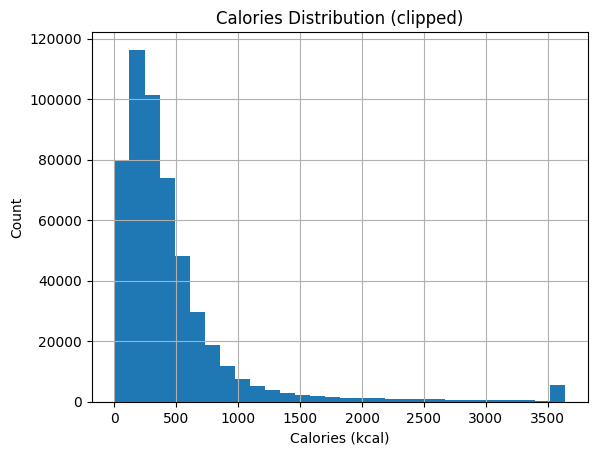

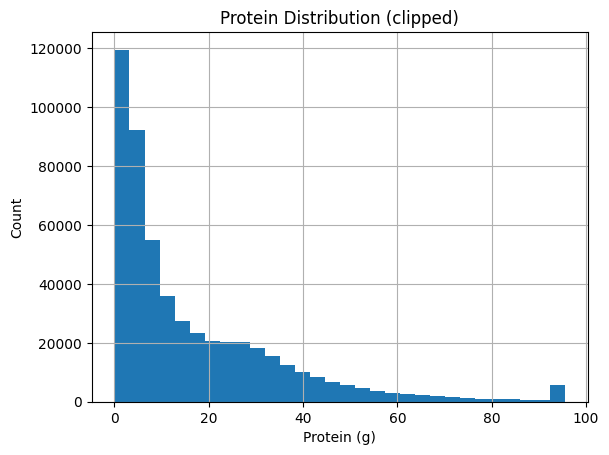

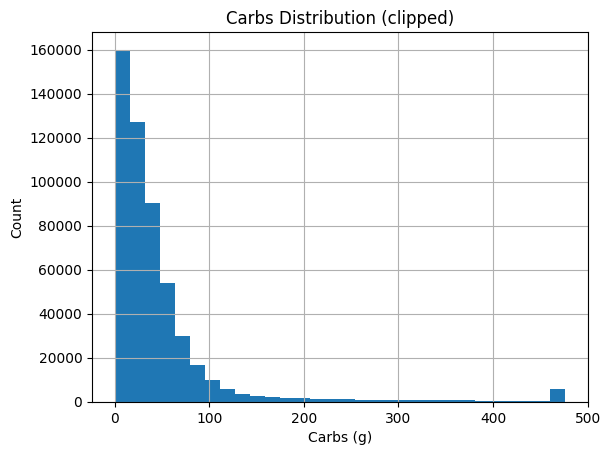

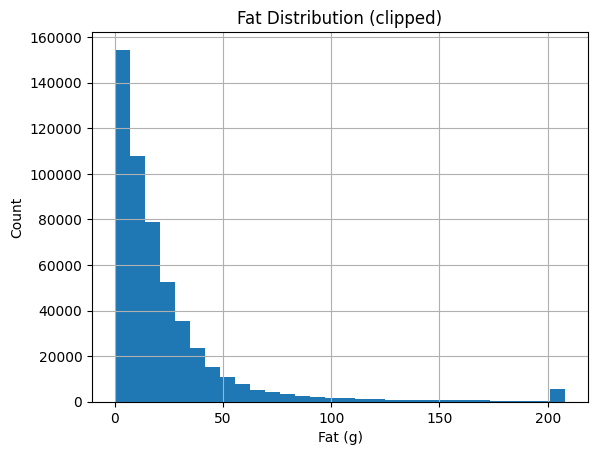

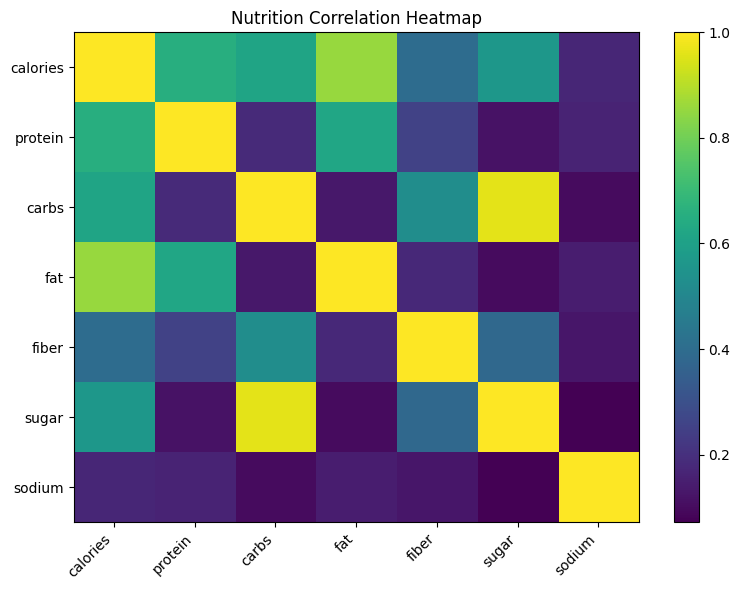

,count
category_clean,
dessert,61989
lunch snacks,32568
one dish meal,31330
vegetable,27204
breakfast,21077
beverages,16045
chicken,13237
meat,13114
breads,12784


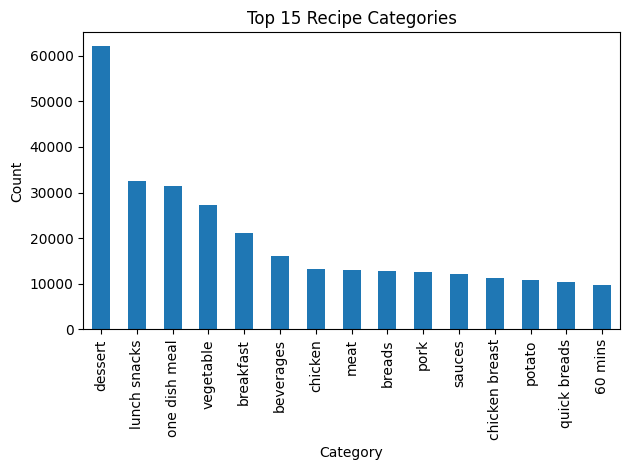

Targets per meal: {'calories': 877.6875, 'protein': 54.85546875, 'carbs': 98.73984374999999, 'fat': 29.256249999999998}


,name,category,calories,protein,carbs,fat,sim_score,nutri_dist,final_score
0,Gorp,Lunch/Snacks,637.3,20.1,60.1,40.6,0.551928,1.686537,0.304668
1,Baked Noodles,Lunch/Snacks,832.4,45.4,90.9,31.2,0.417872,0.369807,0.279324
2,Cheesy Tuna Ramen,Lunch/Snacks,770.9,55.9,59.2,33.3,0.382178,0.679374,0.238235
3,Croque Monsieur,Lunch/Snacks,760.3,48.0,67.8,32.2,0.361982,0.672686,0.224446
4,21 Club Burger,Lunch/Snacks,738.2,49.2,29.7,45.7,0.423276,1.523293,0.223104
5,Quesedillas,Lunch/Snacks,934.0,47.7,64.5,53.8,0.411368,1.380294,0.222207
6,Pilgrim Sandwich,Lunch/Snacks,917.6,51.9,76.3,44.0,0.366411,0.830566,0.219333
7,Maid-Rite (Loose Meat),Lunch/Snacks,1000.7,67.0,24.4,68.5,0.480974,2.455813,0.214983
8,Chicken Chipotle Panini Sandwich,Lunch/Snacks,931.2,75.6,77.9,34.1,0.358246,0.815758,0.214388
9,BLT Burgers,Lunch/Snacks,796.6,42.2,21.6,58.6,0.443426,2.107327,0.206827


,Day,Meal,Name,Category,Calories,Protein,Carbs,Fat,Score
0,Mon,Breakfast,Waffled Pizza,Breakfast,758.3,30.8,94.8,27.3,0.235809
1,Mon,Lunch,Gorp,Lunch/Snacks,637.3,20.1,60.1,40.6,0.243456
2,Mon,Dinner,Working Woman's Turkey Dinner,High Protein,872.9,99.9,40.4,32.3,0.256358
3,Tue,Breakfast,Breakfast Casserole,Breakfast,707.9,41.0,21.5,50.0,0.203291
4,Tue,Lunch,Baked Noodles,Lunch/Snacks,832.4,45.4,90.9,31.2,0.233018
5,Tue,Dinner,Happy Kitty Sardine Dinner,High Protein,683.2,66.6,36.4,27.8,0.203709
6,Wed,Breakfast,Bisquick Clone,Breads,675.1,11.6,93.5,28.3,0.197011
7,Wed,Lunch,Cheesy Tuna Ramen,Lunch/Snacks,770.9,55.9,59.2,33.3,0.195917
8,Wed,Dinner,Tuna Ramen Dinner (Great for College Kids!),One Dish Meal,780.9,62.3,69.2,27.9,0.213227
9,Thu,Breakfast,Halleluiah Waffles,Breakfast,581.8,11.5,60.2,33.0,0.180838


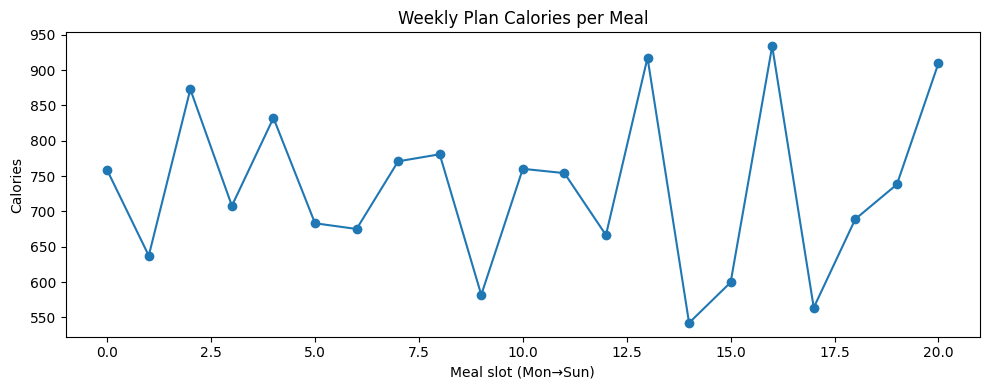

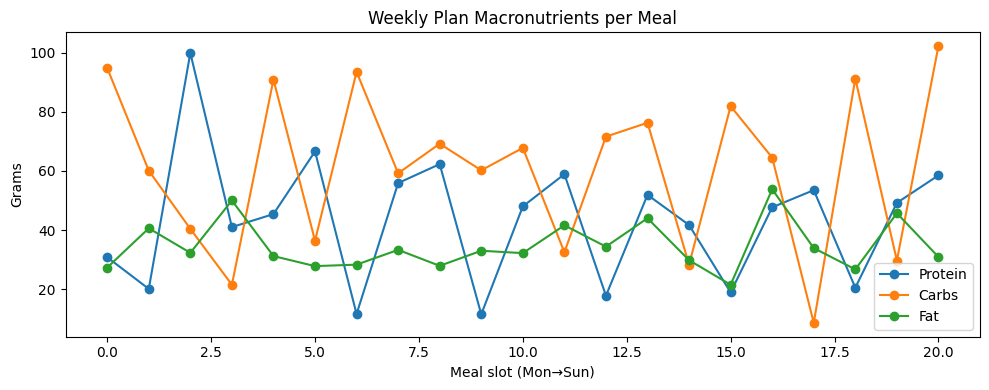

,Weekly Total
Calories,15375.7
Protein,911.7
Carbs,1280.8
Fat,726.2


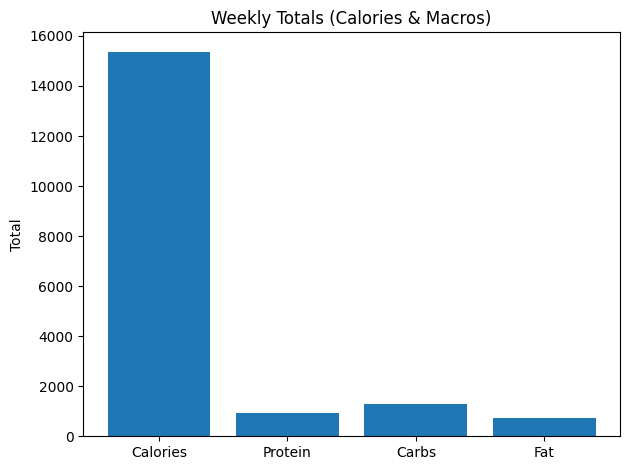

Saved to: thesis_outputs
 - cleaned_recipes_dataset.csv
 - top_recommendations_lunch.csv
 - weekly_plan.csv


In [ ]:
import os, re, json, glob, warnings
from dataclasses import dataclass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings("ignore")

# ----------------------------
# 1) LOAD DATA (choose recipes.csv)
# ----------------------------
import kagglehub

path = kagglehub.dataset_download("satputeharsh/diet-recommendation-dataset")
print("Path:", path)

csv_files = glob.glob(os.path.join(path, "**", "*.csv"), recursive=True)
print("CSV files:", csv_files)

# Prefer recipes.csv explicitly
recipes_path = None
for f in csv_files:
    if os.path.basename(f).lower() == "recipes.csv":
        recipes_path = f
        break

if recipes_path is None:
    recipes_path = csv_files[0]

df_raw = pd.read_csv(recipes_path)
print("Loaded:", recipes_path, "shape:", df_raw.shape)
display(df_raw.head())


# ----------------------------
# 2) NORMALIZE COLUMNS
# ----------------------------
def normalize_colname(c: str) -> str:
    c = c.lower().strip()
    c = re.sub(r"[^a-z0-9]+", "_", c)
    return c

df = df_raw.copy()
df.columns = [normalize_colname(c) for c in df.columns]
print("Columns:", df.columns.tolist())


# ----------------------------
# 3) STRONG COLUMN MAPPING (THIS DATASET-SPECIFIC)
# ----------------------------
# This dataset has:
# recipecategory, keywords, recipeingredientparts, recipeinstructions
# calories, fatcontent, carbohydratecontent, proteincontent, fibercontent, sugarcontent, sodiumcontent

MAP = {
    "name": "name",
    "category": "recipecategory",
    "tags": "keywords",
    "ingredients": "recipeingredientparts",
    "instructions": "recipeinstructions",
    "calories": "calories",
    "protein": "proteincontent",
    "carbs": "carbohydratecontent",
    "fat": "fatcontent",
    "fiber": "fibercontent",
    "sugar": "sugarcontent",
    "sodium": "sodiumcontent",
}

def safe_series(df, col, default=""):
    if col in df.columns:
        return df[col]
    return pd.Series([default] * len(df))

def to_numeric(series):
    s = series.astype(str).str.replace(",", "")
    s = s.str.extract(r"([-+]?\d*\.?\d+)")[0]
    return pd.to_numeric(s, errors="coerce")

df_std = pd.DataFrame()
df_std["name"] = safe_series(df, MAP["name"], "unknown").astype(str)
df_std["category"] = safe_series(df, MAP["category"], "unknown").astype(str)
df_std["tags"] = safe_series(df, MAP["tags"], "").astype(str)
df_std["ingredients"] = safe_series(df, MAP["ingredients"], "").astype(str)
df_std["instructions"] = safe_series(df, MAP["instructions"], "").astype(str)

# Nutrition
nut_cols = ["calories", "protein", "carbs", "fat", "fiber", "sugar", "sodium"]
for n in nut_cols:
    df_std[n] = to_numeric(safe_series(df, MAP[n], np.nan))

print("Standardized:", df_std.shape)
display(df_std.head())


# ----------------------------
# 4) CLEAN TEXT (parse weird c("...") format)
# ----------------------------
def clean_text(s):
    s = str(s).lower()
    s = s.replace("c(", " ").replace(")", " ")
    s = s.replace('"', " ").replace("'", " ")
    s = re.sub(r"[^a-z0-9,;: \n]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

for c in ["name", "category", "tags", "ingredients", "instructions"]:
    df_std[c] = df_std[c].fillna("").astype(str)

df_std["category_clean"] = df_std["category"].apply(clean_text)
df_std["tags_clean"] = df_std["tags"].apply(clean_text)
df_std["ingredients_clean"] = df_std["ingredients"].apply(clean_text)

df_std["content_text"] = (
    df_std["name"].apply(clean_text) + " " +
    df_std["category_clean"] + " " +
    df_std["tags_clean"] + " " +
    df_std["ingredients_clean"]
).str.strip()

# Drop duplicates
df_std = df_std.drop_duplicates(subset=["name", "content_text"]).reset_index(drop=True)

# Handle missing nutrition with median (only where needed)
for c in nut_cols:
    if df_std[c].isna().mean() < 1.0:
        df_std[c] = df_std[c].fillna(df_std[c].median())

print("After cleaning:", df_std.shape)
display(df_std.sample(5, random_state=7))


# ----------------------------
# 5) EDA (ONLY PLOT IF VALUES EXIST)
# ----------------------------
display(df_std[nut_cols].describe().T)

def plot_hist_if_valid(series, title, xlabel):
    if series.notna().sum() == 0:
        print(f"Skipping plot '{title}' (no values).")
        return
    plt.figure()
    series.dropna().clip(lower=0, upper=series.quantile(0.99)).hist(bins=30)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.show()

plot_hist_if_valid(df_std["calories"], "Calories Distribution (clipped)", "Calories (kcal)")
plot_hist_if_valid(df_std["protein"], "Protein Distribution (clipped)", "Protein (g)")
plot_hist_if_valid(df_std["carbs"], "Carbs Distribution (clipped)", "Carbs (g)")
plot_hist_if_valid(df_std["fat"], "Fat Distribution (clipped)", "Fat (g)")

# Correlation only if >1 nutrition column has values
valid_cols = [c for c in nut_cols if df_std[c].notna().sum() > 0]
if len(valid_cols) >= 2:
    corr = df_std[valid_cols].corr()
    plt.figure(figsize=(8, 6))
    plt.imshow(corr, aspect="auto")
    plt.xticks(range(len(valid_cols)), valid_cols, rotation=45, ha="right")
    plt.yticks(range(len(valid_cols)), valid_cols)
    plt.colorbar()
    plt.title("Nutrition Correlation Heatmap")
    plt.tight_layout()
    plt.show()

# Category plot
top_cat = df_std["category_clean"].replace("", "unknown").value_counts().head(15)
display(top_cat.to_frame("count"))
plt.figure()
top_cat.plot(kind="bar")
plt.title("Top 15 Recipe Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# ----------------------------
# 6) USER MODEL (BMR/TDEE + macro targets)
# ----------------------------
@dataclass
class UserProfile:
    age: int
    sex: str
    weight_kg: float
    height_cm: float
    activity_level: str
    goal: str  # maintain/loss/gain
    diet_preference: str  # e.g. vegan, vegetarian, keto, halal, none
    allergies: list
    meals_per_day: int = 3

ACTIVITY_MULT = {
    "sedentary": 1.2,
    "light": 1.375,
    "moderate": 1.55,
    "active": 1.725,
    "very_active": 1.9
}

def mifflin_st_jeor_bmr(age, sex, weight_kg, height_cm):
    if sex.lower() == "male":
        return 10*weight_kg + 6.25*height_cm - 5*age + 5
    return 10*weight_kg + 6.25*height_cm - 5*age - 161

def compute_targets(user: UserProfile):
    bmr = mifflin_st_jeor_bmr(user.age, user.sex, user.weight_kg, user.height_cm)
    tdee = bmr * ACTIVITY_MULT.get(user.activity_level, 1.55)

    if user.goal == "loss":
        tdee_adj = max(1200, tdee - 400)
    elif user.goal == "gain":
        tdee_adj = tdee + 300
    else:
        tdee_adj = tdee

    # Balanced macro split (adjustable)
    pct = {"protein": 0.25, "carbs": 0.45, "fat": 0.30}
    protein_g = (tdee_adj * pct["protein"]) / 4
    carbs_g = (tdee_adj * pct["carbs"]) / 4
    fat_g = (tdee_adj * pct["fat"]) / 9

    per_meal = {
        "calories": tdee_adj / user.meals_per_day,
        "protein": protein_g / user.meals_per_day,
        "carbs": carbs_g / user.meals_per_day,
        "fat": fat_g / user.meals_per_day,
    }
    return {"bmr": bmr, "tdee": tdee, "tdee_adjusted": tdee_adj, "targets_per_meal": per_meal}


# ----------------------------
# 7) RULE FILTERING (allergy + preference + meal calorie band)
# ----------------------------
def rule_filter(df, user, targets, meal_type=None):
    out = df.copy()

    # Allergy filter
    if user.allergies:
        patt = "|".join([re.escape(a.lower().strip()) for a in user.allergies if a.strip()])
        if patt:
            out = out[~out["ingredients_clean"].str.contains(patt, regex=True, na=False)]

    # Diet preference filter (best-effort keyword match)
    pref = user.diet_preference.lower().strip()
    if pref and pref != "none":
        out = out[out["content_text"].str.contains(pref, na=False)]

    # Meal type filter (optional)
    if meal_type:
        mt = meal_type.lower()
        out = out[out["content_text"].str.contains(mt, na=False) | out["category_clean"].str.contains(mt, na=False)]

    # Calorie tolerance per meal
    c_target = targets["targets_per_meal"]["calories"]
    tol = 0.40
    lo, hi = c_target*(1-tol), c_target*(1+tol)
    out = out[(out["calories"] >= lo) & (out["calories"] <= hi)]

    return out.reset_index(drop=True)


# ----------------------------
# 8) RANKING (TF-IDF + nutrition distance)
# ----------------------------
def build_tfidf(df):
    vec = TfidfVectorizer(max_features=4000, ngram_range=(1,2), min_df=2)
    X = vec.fit_transform(df["content_text"].fillna(""))
    return vec, X

def nutri_distance(row, tpm):
    d = 0.0
    for k in ["calories","protein","carbs","fat"]:
        d += abs(row[k] - tpm[k]) / max(tpm[k], 1e-6)
    return d

def recommend(df, user, targets, query_text="", meal_type=None, top_k=15, exclude_names=None):
    exclude_names = exclude_names or set()
    filtered = rule_filter(df, user, targets, meal_type=meal_type)

    # fallback if too small
    if len(filtered) < 100:
        filtered = df.copy()
        if user.allergies:
            patt = "|".join([re.escape(a.lower().strip()) for a in user.allergies if a.strip()])
            if patt:
                filtered = filtered[~filtered["ingredients_clean"].str.contains(patt, regex=True, na=False)]
        pref = user.diet_preference.lower().strip()
        if pref and pref != "none":
            filtered = filtered[filtered["content_text"].str.contains(pref, na=False)]
        filtered = filtered.reset_index(drop=True)

    # remove already used items
    if exclude_names:
        filtered = filtered[~filtered["name"].isin(exclude_names)].reset_index(drop=True)

    vec, X = build_tfidf(filtered)
    user_context = f"{user.diet_preference} {meal_type or ''} {query_text}".strip()
    if not user_context:
        user_context = "healthy balanced meal"
    q = vec.transform([user_context])

    sim = cosine_similarity(q, X).flatten()
    filtered = filtered.copy()
    filtered["sim_score"] = sim

    tpm = targets["targets_per_meal"]
    filtered["nutri_dist"] = filtered.apply(lambda r: nutri_distance(r, tpm), axis=1)

    # normalize nutrition dist and compute final score
    nd = filtered["nutri_dist"].values
    nd_norm = (nd - nd.min()) / ((nd.max() - nd.min()) + 1e-9)
    filtered["final_score"] = (0.70 * filtered["sim_score"]) - (0.30 * nd_norm)

    recs = filtered.sort_values("final_score", ascending=False).head(top_k).reset_index(drop=True)

    # ✅ robust ranking check (no monotonic assertion)
    # ensure sorted descending:
    assert np.all(recs["final_score"].values[:-1] >= recs["final_score"].values[1:] - 1e-12), "Ranking sort failed!"

    return recs


# ----------------------------
# 9) BUILD BEAUTIFUL WEEK PLAN (NO REPEATS + DIVERSITY)
# ----------------------------
def build_week_plan(df, user, targets):
    days = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    meal_slots = ["breakfast", "lunch", "dinner"][:user.meals_per_day]

    used = set()
    rows = []
    for d in days:
        for m in meal_slots:
            recs = recommend(df, user, targets, query_text="high quality", meal_type=m, top_k=25, exclude_names=used)

            # diversity: pick first not too similar to already used by category
            pick = None
            for _, r in recs.iterrows():
                if r["name"] not in used:
                    pick = r
                    break

            if pick is None:
                pick = recs.iloc[0]

            used.add(pick["name"])
            rows.append({
                "Day": d, "Meal": m.title(),
                "Name": pick["name"],
                "Category": pick["category"],
                "Calories": float(pick["calories"]),
                "Protein": float(pick["protein"]),
                "Carbs": float(pick["carbs"]),
                "Fat": float(pick["fat"]),
                "Score": float(pick["final_score"])
            })
    return pd.DataFrame(rows)

# ----------------------------
# 10) DEMO RUN
# ----------------------------
user = UserProfile(
    age=24, sex="male", weight_kg=72, height_cm=175,
    activity_level="moderate", goal="maintain",
    diet_preference="none",
    allergies=["peanut"],
    meals_per_day=3
)

targets = compute_targets(user)
print("Targets per meal:", targets["targets_per_meal"])

# Top recommendations example
top_recs = recommend(df_std, user, targets, query_text="high protein", meal_type="lunch", top_k=12)
display(top_recs[["name","category","calories","protein","carbs","fat","sim_score","nutri_dist","final_score"]])

# Week plan
week_df = build_week_plan(df_std, user, targets)
display(week_df)

# ----------------------------
# 11) VISUALS FOR WEEK PLAN (BEAUTIFUL & USEFUL)
# ----------------------------
plt.figure(figsize=(10,4))
plt.plot(week_df["Calories"].values, marker="o")
plt.title("Weekly Plan Calories per Meal")
plt.xlabel("Meal slot (Mon→Sun)")
plt.ylabel("Calories")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(week_df["Protein"].values, label="Protein", marker="o")
plt.plot(week_df["Carbs"].values, label="Carbs", marker="o")
plt.plot(week_df["Fat"].values, label="Fat", marker="o")
plt.title("Weekly Plan Macronutrients per Meal")
plt.xlabel("Meal slot (Mon→Sun)")
plt.ylabel("Grams")
plt.legend()
plt.tight_layout()
plt.show()

# Weekly totals table
weekly_totals = week_df[["Calories","Protein","Carbs","Fat"]].sum()
display(weekly_totals.to_frame("Weekly Total"))

plt.figure()
plt.bar(weekly_totals.index, weekly_totals.values)
plt.title("Weekly Totals (Calories & Macros)")
plt.ylabel("Total")
plt.tight_layout()
plt.show()

# ----------------------------
# 12) EXPORT (THESIS APPENDIX READY)
# ----------------------------
out_dir = "thesis_outputs"
os.makedirs(out_dir, exist_ok=True)

df_std.to_csv(os.path.join(out_dir, "cleaned_recipes_dataset.csv"), index=False)
top_recs.to_csv(os.path.join(out_dir, "top_recommendations_lunch.csv"), index=False)
week_df.to_csv(os.path.join(out_dir, "weekly_plan.csv"), index=False)

print("Saved to:", out_dir)
print(" - cleaned_recipes_dataset.csv")
print(" - top_recommendations_lunch.csv")
print(" - weekly_plan.csv")
